In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [108]:
from shapely import wkt
df = pd.read_csv("NarrowFactors.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

In [109]:
gdf.to_file("NarrowFactors.shp")

In [110]:
from sklearn import preprocessing
# cite from https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
# Get column names first
dfFactors = pd.read_csv("NarrowFactors.csv")
df = dfFactors.iloc[:,2:-1]
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
dfFactors.iloc[:,2:-1] = scaled_df


In [111]:
scaled_df.columns

Index(['children', 'teenagers', 'seniors', 'white', 'black', 'asian',
       'otherraces', 'latino', 'transport'],
      dtype='object')

In [113]:
dfFactors['geometry'] = dfFactors['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(dfFactors, crs='epsg:4326')
gdf.to_file("standardized_NarrowFactors.shp")

In [163]:
def single_map(name):
    
    # load data from plot data from file
    street = gpd.read_file("./plot/background/street-shp")
    df_cen = gpd.read_file("./plot/background/standardized_NarrowFactors-shp")
    gdf = gpd.GeoDataFrame(df_cen, geometry=df_cen.geometry)
    
    menu = pd.read_csv("menu.csv")
    cato = int(menu[menu.name == name].index.values)
#     key = menu.loc[cato,"key"]
    fullName = menu.loc[cato,"full_name"]
    
    ax=gdf.plot(column=name, cmap='BuPu',figsize=(8,8),legend=False,alpha=0.35
                 ,legend_kwds={'orientation': "horizontal",
                    'shrink': 0.5,'alpha':0.35,'pad':0.01})
    fig = ax.figure
    #cb_ax = fig.axes[1] 
    #cb_ax.tick_params(labelsize=20)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.set_axis_off()    
    ax.title.set_text(fullName)
    
    return ax
    


<AxesSubplot:title={'center':'Black or African American (Census 2010)'}>

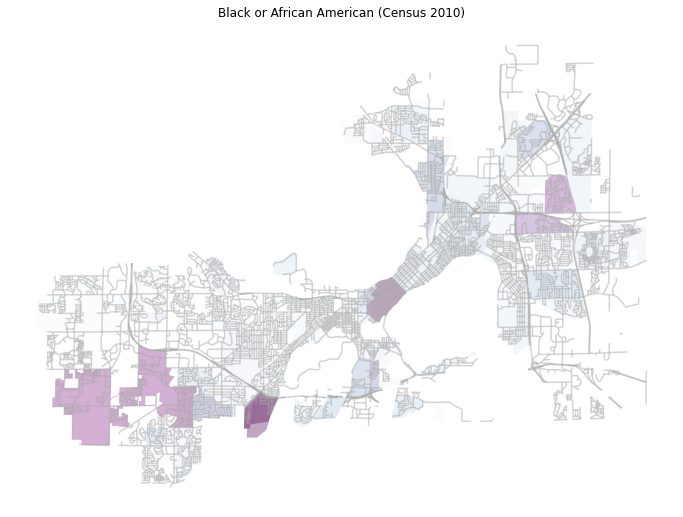

In [131]:
single_map("black")

In [117]:
def print_menu():
    menu = pd.read_csv("menu.csv")
    for ix,row in menu.iterrows():
        print(row["name"]+": "+row["full_name"])

In [154]:
def combine_map(catodic):
    
    ratioSum = sum(catodic.values())
    
    processDic = {}
    for key,value in catodic.items():
        processDic[key] = value/ratioSum
        
    # load data from plot data from file
    street = gpd.read_file("./plot/background/street-shp")
    df_cen = gpd.read_file("./plot/background/standardized_NarrowFactors-shp")
    df_cen["transport"] = -df_cen["transport"]
    
    menu = pd.read_csv("menu.csv")
    df_cen['utility_map'] = 0
    
    # construct the utility function
    for key in processDic.keys():
        #key = menu.loc[cato,"key"]
        df_cen['utility_map'] += processDic[key]*df_cen[key]

    gdf = gpd.GeoDataFrame(df_cen, geometry=df_cen.geometry)
    ax=gdf.plot(column='utility_map', cmap='BuPu',figsize=(12,12),legend=False,alpha=1
                 ,legend_kwds={'orientation': "horizontal",
                    'shrink': 0.5,'alpha':0.35,'pad':0.01})
    fig = ax.figure
    #cb_ax = fig.axes[1] 
    #cb_ax.tick_params(labelsize=20)   
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.title.set_text(catodic)
    ax.set_axis_off()
    return ax
    


In [158]:
def utilityMap(catodic):
    for each in catodic.keys():
        single_map(each)
    combine_map(catodic)

In [155]:
print_menu()

children: Young Children - Age 0 to 4 (Census 2010)
teenagers: Youth Population - Age 0 to 17 (Census 2010)
seniors: Senior Population - Age 65 and Over (Census 2010)
white: White (Census 2010)
black: Black or African American (Census 2010)
asian: Asian (Census 2010)
otherraces: Other Races or Multiracial (Census 2010)
latino: Hispanic or Latino (Census 2010)
transport: Available Transit Service


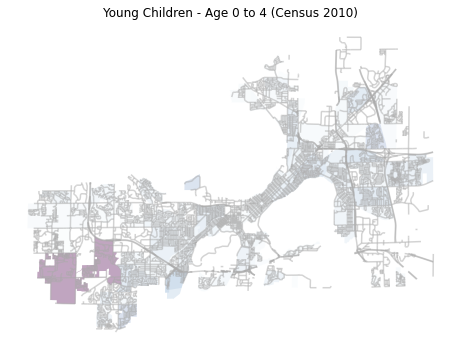

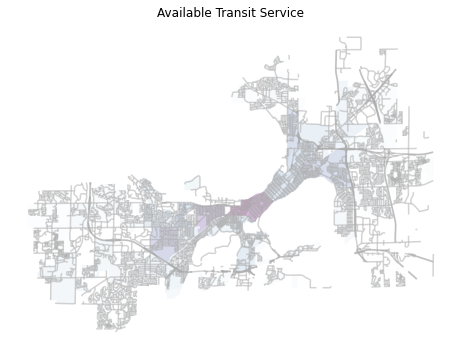

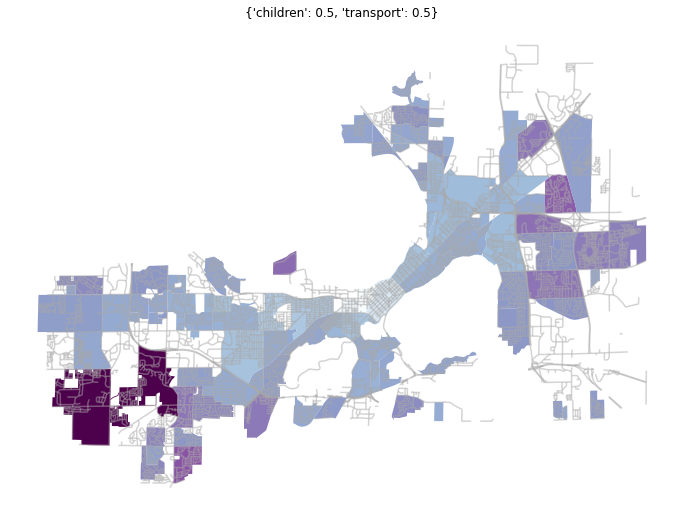

In [169]:
utilityMap({"children":0.5,"transport":0.5})